In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from terminal_optimization import hydrogen_objects
from terminal_optimization import hydrogen_defaults
from terminal_optimization import hydrogen_system

# 0. Prepare inputs

In [2]:
startyear = 2018
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2023:
        demand.append(750_000)
    else:
        demand.append(1_600_000)

scenario_data={'year': years, 'volume': demand}

# instantiate a commodity objects
# maize
hydrogen_defaults.maize_data['handysize_perc'] = 0
hydrogen_defaults.maize_data['handymax_perc'] = 100
hydrogen_defaults.maize_data['panamax_perc'] = 0
hydrogen_defaults.maize_data['handling_fee'] = 9.8 # example Wijnand
hydrogen_defaults.maize_data['historic_data'] = []
maize = hydrogen_objects.Commodity(**hydrogen_defaults.maize_data)
maize.scenario_data = pd.DataFrame(data=scenario_data)

# wheat
hydrogen_defaults.wheat_data['historic_data'] = []
hydrogen_defaults.wheat_data['scenario_data'] = []
wheat = hydrogen_objects.Commodity(**hydrogen_defaults.wheat_data)

# soybeans
hydrogen_defaults.soybean_data['historic_data'] = []
hydrogen_defaults.soybean_data['scenario_data'] = []
soybeans = hydrogen_objects.Commodity(**hydrogen_defaults.soybean_data)

# combine
demand = [maize, wheat, soybeans]

# plot scenarios 
if False:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

## 0.2 Generate vessels

In [4]:
# instantiate vessels
handysize = hydrogen_objects.Vessel(**hydrogen_defaults.handysize_data)
hydrogen_defaults.handymax_data['call_size'] = 50000
handymax = hydrogen_objects.Vessel(**hydrogen_defaults.handymax_data)
panamax = hydrogen_objects.Vessel(**hydrogen_defaults.panamax_data)


vessels = [handysize, handymax, panamax] 

# 1. Instatiate terminal system

In [5]:
Terminal = hydrogen_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 5840,   # example Wijnand
                         debug=True,
                         crane_type_defaults=hydrogen_defaults.mobile_crane_data, 
                         storage_type_defaults=hydrogen_defaults.silo_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [6]:
Terminal.simulate()


Simulate year: 2018
  Total vessel calls: 15
     Handysize calls: 0
     Handymax calls: 15
     Panamax calls: 0
  Total cargo volume: 750000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
     Crane occupancy planned (@ start of year): inf
     Crane occupancy online (@ start of year): inf
     waiting time factor (@ start of year): inf
     waiting time occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after adding berth): inf
  *** add 

     a total of 66000 ton of storage capacity is online; 90000 ton total planned
     a total of 800 ton of conveyor hinterland service capacity is online; 800 ton total planned
     a total of 800 ton of conveyor hinterland service capacity is online; 800 ton total planned
     Station occupancy planned (@ start of year): 0.4954296613738265
     Station occupancy online (@ start of year): 0.4954296613738265
     Number of trains (@start of year): 444.4444444444445
  *** add station to elements

Simulate year: 2024
  Total vessel calls: 32
     Handysize calls: 0
     Handymax calls: 32
     Panamax calls: 0
  Total cargo volume: 1600000
     a total of 2 Berth_01 is online; 2 total planned
     a total of 1 Quay_01 is online; 2 total planned
     a total of 3 Mobile_crane_01 is online; 4 total planned
     a total of 0 [] is online; 0 total planned
     a total of 4 Quay_conveyor_01 is online; 6 total planned
     a total of 15 Silo_01 is online; 15 total planned
     a total of 2 Hin

## Report all elements

In [7]:
if False: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)

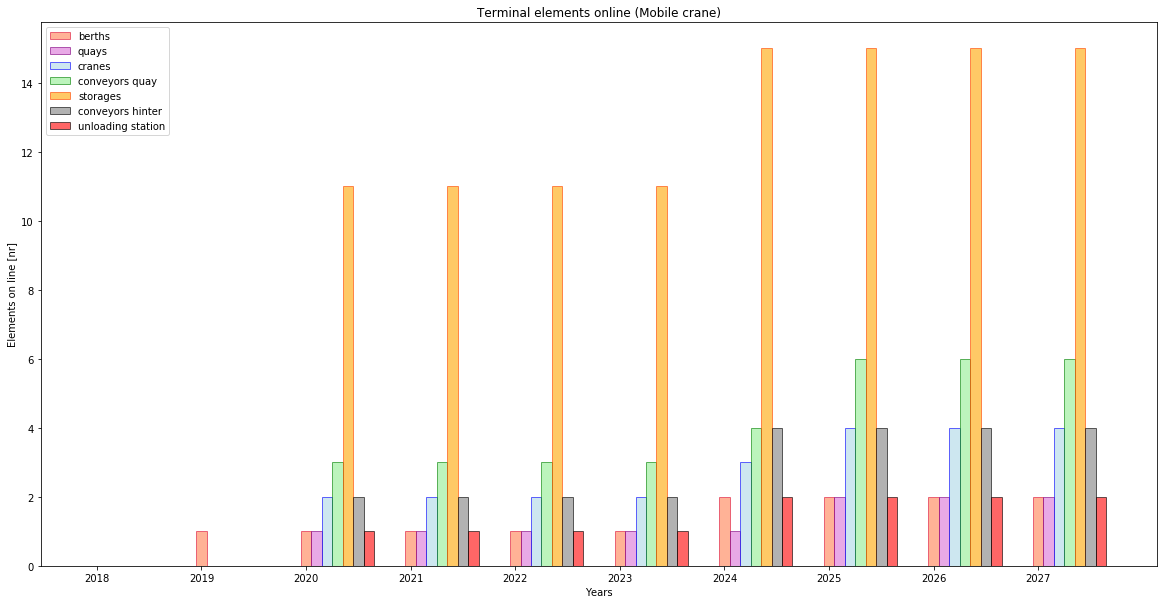

In [8]:
Terminal.terminal_elements_plot()

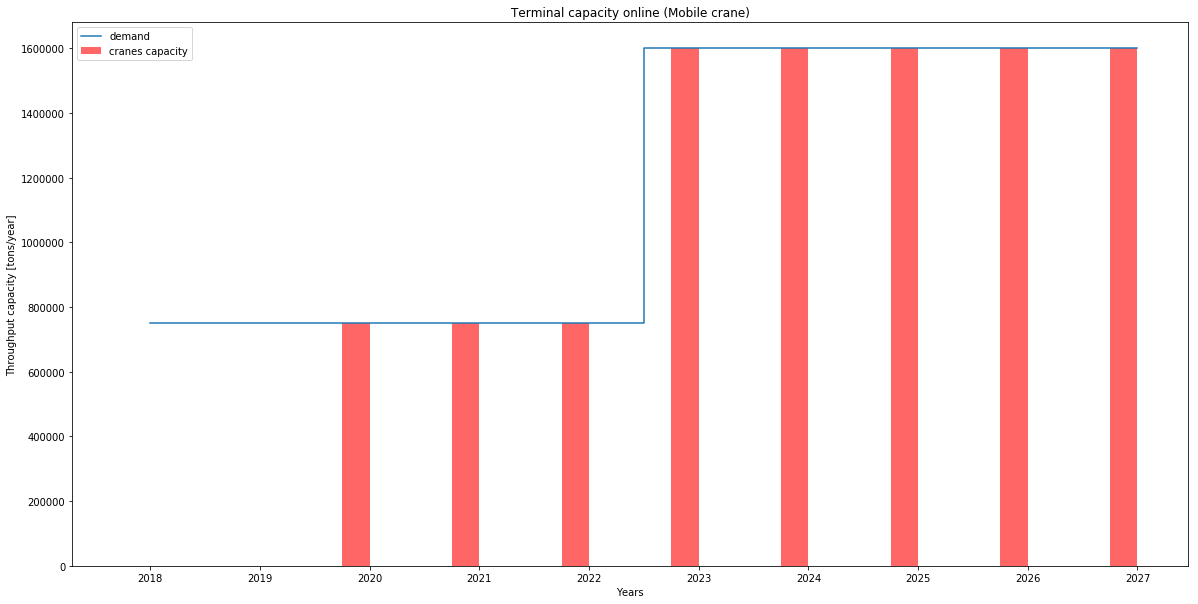

In [9]:
Terminal.terminal_capacity_plot()

In [10]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

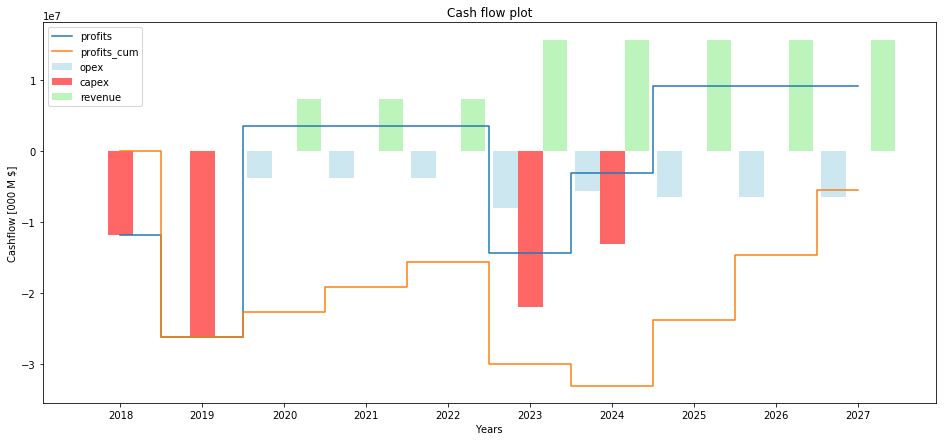

In [11]:
Terminal.cashflow_plot(cash_flows)

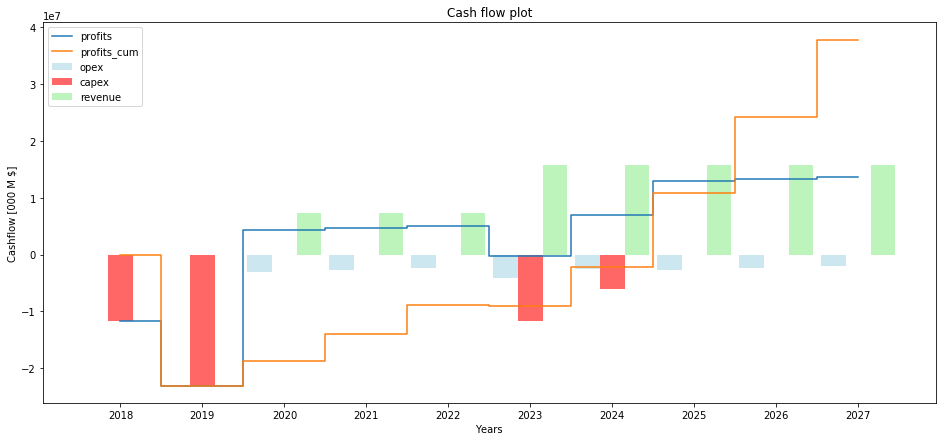

In [12]:
Terminal.cashflow_plot(cash_flows_WACC_real)

## SandBox

In [13]:
Terminal.NPV()

PV: [-11752800.         -23028102.55524862   4359104.75691577
   4716442.37919034   5031087.03968763   -181201.53463137
   6958881.49747337  13004194.37227778  13323886.6192363
  13605383.59083307]
NPV: 26036876.165734276
